In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [72]:
"""
Combine train and test data 
Add one more column to the combined data to identify train and test data.
"""
def combine_datasets(train, test):
    dataset_train['source'] = 'train'
    dataset_test['source'] = 'test'
    combined_data = pd.concat([dataset_train,dataset_test], ignore_index=True)
    return combined_data;


In [73]:
"""
Print the summary of the given dataframe.
This method prints following summary details of the dataframe:
    1: shape
    2: Null values per column
"""
def print_dataset_summary(dataset):
    print("\n\n<------ Summary for data --->")
    print("\tShape of train data",dataset.shape)

    print("\tPrinting null values per column :")    
    print(combined_data.apply(lambda x: sum(x.isnull())))    


In [74]:
"""
Calculate mean square error.
"""
def calculate_mse(Y_pred, Y_actual):
    # calculate MSE
    mse = np.mean((Y_pred-Y_actual)**2)
    return mse

In [75]:
def plot_residual_graph(Y_pred, Y_actual):
    # Plot the graph and check the data pattern.
    # residual plot
    x_plot = plt.scatter(Y_pred, (Y_pred - Y_actual), c='b')
    plt.hlines(y=0, xmin= -1000, xmax=5000)
    plt.title('Residual plot')


In [76]:
def unique_val_categorical_col(categorical_columns):
    for column in categorical_columns:
        print("<--------- Column name: ",column," ----------->")
        print(combined_data[column].value_counts())
        

In [77]:
def plot_categorical_features(df, categorical_columns):
   print("Size of list: ",len(categorical_columns))
   for column in categorical_columns:
       df[column].value_counts().plot(kind="bar",title=column)
       plt.show()

In [78]:
# Importing the dataset
dataset_train = pd.read_csv('data/train_av.csv')
dataset_test = pd.read_csv('data/test_av.csv')
    
combined_data = combine_datasets(dataset_train, dataset_test)
 

/home/ketan/installation/anaconda3/envs/datascience_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [79]:
print("Summary of train data")
print_dataset_summary(dataset_train)    

Summary of train data


<------ Summary for data --->
	Shape of train data (614, 14)
	Printing null values per column :
ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64


In [80]:
print("Summary of test data")
print_dataset_summary(dataset_test)    


Summary of test data


<------ Summary for data --->
	Shape of train data (367, 13)
	Printing null values per column :
ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64


In [81]:
print("Summary of combined data")
print_dataset_summary(combined_data)   

Summary of combined data


<------ Summary for data --->
	Shape of train data (981, 14)
	Printing null values per column :
ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64


In [82]:
#get categorical column
categorical_column = [x for x in combined_data.dtypes.index if combined_data.dtypes[x] == 'object']
print(categorical_column)

['Dependents', 'Education', 'Gender', 'Loan_ID', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed', 'source']


In [83]:
unique_val_categorical_col(categorical_column)

<--------- Column name:  Dependents  ----------->
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
<--------- Column name:  Education  ----------->
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
<--------- Column name:  Gender  ----------->
Male      775
Female    182
Name: Gender, dtype: int64
<--------- Column name:  Loan_ID  ----------->
LP002657    1
LP001657    1
LP002412    1
LP002989    1
LP002057    1
LP001325    1
LP001568    1
LP001817    1
LP002792    1
LP001036    1
LP001221    1
LP001827    1
LP001578    1
LP002784    1
LP002505    1
LP001599    1
LP001639    1
LP001370    1
LP001910    1
LP001107    1
LP001391    1
LP001643    1
LP002175    1
LP001691    1
LP002170    1
LP001024    1
LP001280    1
LP002720    1
LP002103    1
LP001945    1
           ..
LP002888    1
LP002325    1
LP001207    1
LP002860    1
LP002495    1
LP002205    1
LP001469    1
LP002344    1
LP001270    1
LP002964    1
LP002138    1
LP002319    1
LP001884  

Size of list:  9


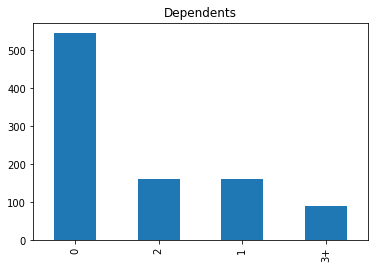

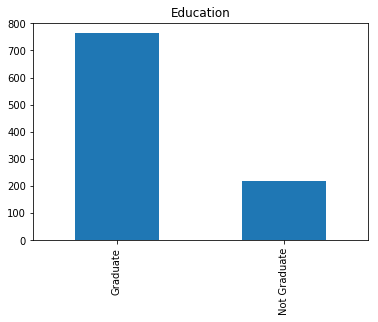

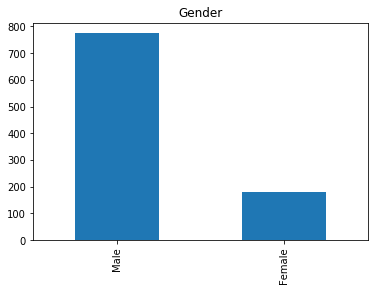

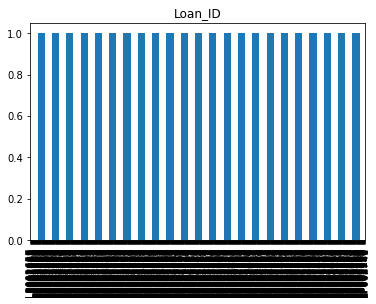

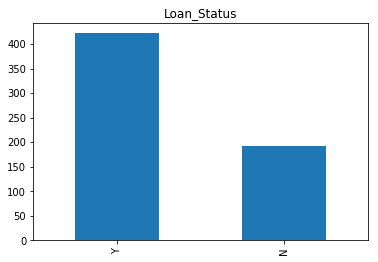

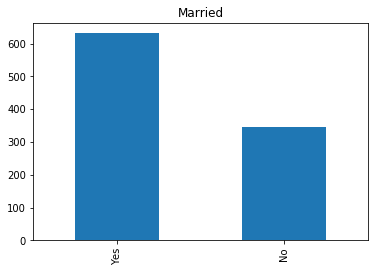

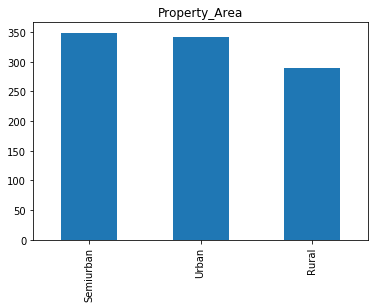

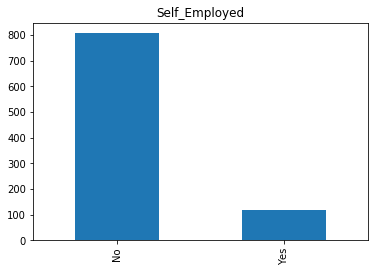

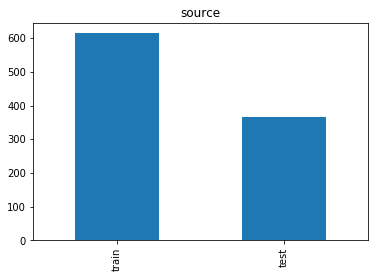

In [84]:
plot_categorical_features(combined_data, categorical_column)

In [85]:
# Missing value imputation for categorical features.

combined_data["Gender"].fillna("Male",inplace=True)
combined_data["Married"].fillna("Yes",inplace=True)
combined_data["Credit_History"].fillna(1,inplace=True)
combined_data["Credit_History"].fillna(1,inplace=True)
combined_data['Dependents'] = combined_data['Dependents'].map({'3+':'3', '1' : '1', '0' : '0', '2' : '2'})


In [86]:
print_dataset_summary(combined_data)



<------ Summary for data --->
	Shape of train data (981, 14)
	Printing null values per column :
ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
source                 0
dtype: int64


In [87]:
#combined_data['Loan_Amount_Term'].value_counts()
combined_data["Loan_Amount_Term"].fillna(360.0,inplace=True)
missing_loan_amt = combined_data['LoanAmount'].isnull()
mean_loan_amt = combined_data["LoanAmount"].mean()
combined_data["LoanAmount"].fillna(mean_loan_amt, inplace= True)
combined_data["Dependents"].fillna(0, inplace= True)
combined_data["Self_Employed"].fillna("No", inplace= True)

In [88]:

combined_data = pd.get_dummies(combined_data, columns=['Education','Gender','Property_Area','Self_Employed','Married'])

In [89]:
combined_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,source,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes
0,5849,0.0,1.0,0,142.51153,360.0,LP001002,Y,train,1,0,0,1,0,0,1,1,0,1,0
1,4583,1508.0,1.0,1,128.00000,360.0,LP001003,N,train,1,0,0,1,1,0,0,1,0,0,1
2,3000,0.0,1.0,0,66.00000,360.0,LP001005,Y,train,1,0,0,1,0,0,1,0,1,0,1
3,2583,2358.0,1.0,0,120.00000,360.0,LP001006,Y,train,0,1,0,1,0,0,1,1,0,0,1
4,6000,0.0,1.0,0,141.00000,360.0,LP001008,Y,train,1,0,0,1,0,0,1,1,0,1,0


In [90]:
print_dataset_summary(combined_data)



<------ Summary for data --->
	Shape of train data (981, 20)
	Printing null values per column :
ApplicantIncome              0
CoapplicantIncome            0
Credit_History               0
Dependents                   0
LoanAmount                   0
Loan_Amount_Term             0
Loan_ID                      0
Loan_Status                367
source                       0
Education_Graduate           0
Education_Not Graduate       0
Gender_Female                0
Gender_Male                  0
Property_Area_Rural          0
Property_Area_Semiurban      0
Property_Area_Urban          0
Self_Employed_No             0
Self_Employed_Yes            0
Married_No                   0
Married_Yes                  0
dtype: int64


In [91]:
train = combined_data.loc[combined_data['source']=="train"]
test = combined_data.loc[combined_data['source']=="test"]


In [92]:
test.drop(['Loan_Status','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [93]:
test.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Loan_ID,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes
614,5720,0.0,1.0,0,110.0,360.0,LP001015,1,0,0,1,0,0,1,1,0,0,1
615,3076,1500.0,1.0,1,126.0,360.0,LP001022,1,0,0,1,0,0,1,1,0,0,1
616,5000,1800.0,1.0,2,208.0,360.0,LP001031,1,0,0,1,0,0,1,1,0,0,1
617,2340,2546.0,1.0,2,100.0,360.0,LP001035,1,0,0,1,0,0,1,1,0,0,1
618,3276,0.0,1.0,0,78.0,360.0,LP001051,0,1,0,1,0,0,1,1,0,1,0


In [94]:
target = 'Loan_Status'
IDcol = ['Loan_ID']
submissionCols = ['Loan_ID','Loan_Status']

In [95]:
predictors = [x for x in train.columns if x not in [target]+IDcol]

In [96]:
predictors

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'LoanAmount',
 'Loan_Amount_Term',
 'Education_Graduate',
 'Education_Not Graduate',
 'Gender_Female',
 'Gender_Male',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Married_No',
 'Married_Yes']

In [97]:
X = train[predictors]
Y = train[target]

In [98]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [99]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [116]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
classifier = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [117]:
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [118]:
cm

array([[16, 17],
       [ 5, 85]])

In [119]:
test[target] = classifier.predict(test[predictors])

submission = test[IDcol]
submission[target] = test[target]
submission.to_csv("data/ada_boost.csv", index=False)

/home/ketan/installation/anaconda3/envs/datascience_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ketan/installation/anaconda3/envs/datascience_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
